In [2]:
# pip install seaborn
# pip install statsmodels

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import ttest_ind, mannwhitneyu

In [5]:
df = pd.read_csv('train.csv', encoding='ISO-8859-1')
df.head()

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,customer_job,lead_desc_length,inquiry_type,product_category,product_subcategory,product_modelname,customer_country.1,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,NaN,purchasing,62,Quotation or purchase consultation,multi-split,NaN,NaN,/Quezon City/Philippines,entry level,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,NaN,media and communication,96,Quotation or purchase consultation,multi-split,NaN,NaN,/PH-00/Philippines,ceo/founder,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,NaN,engineering,56,Product Information,single-split,NaN,NaN,/Kolkata /India,partner,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,NaN,entrepreneurship,44,Quotation or purchase consultation,vrf,NaN,NaN,/Bhubaneswar/India,ceo/founder,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,NaN,consulting,97,Quotation or purchase consultation,multi-split,NaN,NaN,/Hyderabad/India,partner,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

In [7]:
df.columns

Index(['bant_submit', 'customer_country', 'business_unit',
       'com_reg_ver_win_rate', 'customer_idx', 'customer_type', 'enterprise',
       'historical_existing_cnt', 'id_strategic_ver', 'it_strategic_ver',
       'idit_strategic_ver', 'customer_job', 'lead_desc_length',
       'inquiry_type', 'product_category', 'product_subcategory',
       'product_modelname', 'customer_country.1', 'customer_position',
       'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
       'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area',
       'business_subarea', 'lead_owner', 'is_converted'],
      dtype='object')

In [8]:
df.describe()

,bant_submit,com_reg_ver_win_rate,customer_idx,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,lead_desc_length,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,lead_owner
count,59299.000000,14568.000000,59299.000000,13756.000000,3444.0,1121.0,4565.0,59299.000000,59299.000000,59299.000000,18417.000000,15304.000000,59299.000000
mean,0.634593,0.091685,27114.556333,19.912184,1.0,1.0,1.0,79.271590,0.041603,0.050810,0.001117,0.049288,262.563888
std,0.286066,0.150988,14653.911888,44.697938,0.0,0.0,0.0,132.551067,0.199681,0.219612,0.001104,0.027949,231.605681
min,0.000000,0.003788,2.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000002,0.011583,0.000000
25%,0.500000,0.019900,14913.000000,1.000000,1.0,1.0,1.0,7.000000,0.000000,0.000000,0.000298,0.026846,97.000000
50%,0.500000,0.049180,26774.000000,4.000000,1.0,1.0,1.0,29.000000,0.000000,0.000000,0.000572,0.049840,175.000000
75%,1.000000,0.074949,40368.500000,19.000000,1.0,1.0,1.0,92.000000,0.000000,0.000000,0.001183,0.064566,374.000000
max,1.000000,1.000000,47466.000000,1394.000000,1.0,1.0,1.0,1264.000000,1.000000,1.000000,0.003079,0.285714,1114.000000


In [9]:
#1. is_converted가 NA인 데이터 drop
df = df.dropna(subset=['is_converted'])
erased_rows = 59300-len(df)
print('지워진 행: '+str(erased_rows))

지워진 행: 1


In [10]:
print('is_converted unique values:')
df.is_converted.unique()

is_converted unique values:


array([ True, False])

In [11]:
# is_converted 의 값들 정리
# 모두 TRUE or FALSE로 통일, 이외값을 가진 행은 제거
df['is_converted'] = df['is_converted'].astype(str).str.upper()
df = df[df['is_converted'].isin(['TRUE', 'FALSE'])]
print('지워진 행: '+ str(59300-erased_rows-len(df)))

지워진 행: 0


In [12]:
#칼럼별 NA율 정리
# df.isnull().sum()/len(df)*100

In [13]:
#칼럼별 NA율이 50% 이상인 칼럼 나열
for col in df.columns:
    if df[col].isnull().sum()/len(df)*100 > 50:
        print(col, df[col].isnull().sum()/len(df)*100)
        #df.drop(col, axis=1, inplace=True)

com_reg_ver_win_rate 75.43297526096562
customer_type 74.13447107033846
historical_existing_cnt 76.80230695289971
id_strategic_ver 94.19214489283124
it_strategic_ver 98.1095802627363
idit_strategic_ver 92.30172515556755
product_subcategory 84.42638155786776
product_modelname 84.43649977234018
expected_timeline 52.04640887704684
ver_win_rate_x 68.94214067690855
ver_win_ratio_per_bu 74.19180761901549
business_area 68.94214067690855
business_subarea 90.6811244709017


In [14]:
#칼럼별 NA율이 90% 이상인 칼럼 제외
# drop columns with more than 90% missing values
dropped_columns = []
for col in df.columns:
    if df[col].isnull().sum()/len(df)*100 > 90:
        df.drop(col, axis=1, inplace=True)
        
print('number of columns left: '+str(len(df.columns)))

number of columns left: 25


In [15]:
#3.1.중복 행 확인 
df[df.duplicated(keep='first')]

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,customer_job,lead_desc_length,inquiry_type,product_category,product_subcategory,product_modelname,customer_country.1,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,lead_owner,is_converted
320,1.00,/East London/South Africa,AS,0.040816,30958,End-Customer,SMB,NaN,business development,302,Quotation or purchase consultation,etc.,NaN,NaN,/East London/South Africa,manager,LGESA,more than a year,1,0,0.003079,0.026846,corporate / office,26,FALSE
322,1.00,/East London/South Africa,AS,0.040816,30958,End Customer,SMB,NaN,business development,302,Quotation or Purchase Consultation,etc.,NaN,NaN,/East London/South Africa,manager,LGESA,more than a year,1,0,0.003079,0.026846,corporate / office,26,FALSE
344,1.00,/Medellin /Colombia,AS,0.003937,39065,NaN,SMB,0.0,engineering,7,Usage or Technical Consultation,vrf,NaN,NaN,/Medellin /Colombia,associate/analyst,LGECB,9 months ~ 1 year,0,0,0.003079,0.026846,corporate / office,41,FALSE
1253,1.00,/Brisbane/Australia,ID,0.084337,14526,NaN,Enterprise,NaN,information technology,35,Quotation or Purchase Consultation,standard signage,NaN,NaN,/Brisbane/Australia,associate/analyst,LGEAP,less than 3 months,0,1,0.003079,0.064566,corporate / office,306,FALSE
1314,1.00,//Ghana,ID,0.075000,4705,Specifier / Influencer,SMB,NaN,entrepreneurship,48,Quotation or Purchase Consultation,interactive signage,TR3DJ Series,75TR3DJ,//Ghana,ceo/founder,LGEAF,less than 3 months,0,1,0.003079,0.064566,corporate / office,170,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59134,0.75,//Mexico,ID,0.042254,33676,NaN,SMB,NaN,sales,88,Quotation or Purchase Consultation,NaN,NaN,NaN,//Mexico,none,LGEMS,less than 3 months,0,0,0.000026,0.031579,public facility,214,TRUE
59262,1.00,/rio de janeiro /Brazil,AS,0.040000,13618,Specifier/ Influencer,Enterprise,NaN,operations,93,Trainings,vrf,NaN,NaN,/rio de janeiro /Brazil,ceo/founder,LGESP,more than a year,0,0,0.000026,0.028777,public facility,97,FALSE
59275,1.00,/Temuco/Chile,AS,0.040000,22100,Specifier/ Influencer,Enterprise,0.0,administrative,3,Quotation or Purchase Consultation,control,NaN,NaN,/Temuco/Chile,manager,LGECL,less than 3 months,0,0,0.000026,0.028777,public facility,100,FALSE
59290,0.75,/DolnoÅlÄ skie/Poland,AS,NaN,6739,Specifier/ Influencer,SMB,NaN,engineering,226,Quotation or Purchase Consultation,single-split,NaN,NaN,/DolnoÅlÄ skie/Poland,entry level,LGEPL,less than 3 months,0,0,0.000026,0.028777,public facility,694,FALSE


In [16]:
# 3.2. 중복 행 제거
df.drop_duplicates(keep='first', inplace=True)
len(df)

55779

In [17]:
 #4. NA율이 높은 칼럼의 True/False 비율 보기
for col in df.columns:
    if df[col].isnull().sum()/len(df)*100 > 50:
        print(df[col].value_counts(dropna=False, normalize=True))


com_reg_ver_win_rate
NaN         0.746966
0.074949    0.020187
0.073248    0.014020
0.003937    0.013769
0.003788    0.012496
              ...   
0.363636    0.000233
0.444444    0.000215
0.400000    0.000215
1.000000    0.000161
0.200000    0.000090
Name: proportion, Length: 81, dtype: float64
customer_type
NaN                             0.741444
End-Customer                    0.117464
End Customer                    0.063572
Specifier/ Influencer           0.041736
Channel Partner                 0.022984
Service Partner                 0.005665
Solution Eco-Partner            0.002295
Installer/Contractor            0.000753
Specifier / Influencer          0.000681
Corporate                       0.000502
Engineer                        0.000323
HVAC Engineer                   0.000305
Technician                      0.000287
Consultant                      0.000269
Developer                       0.000251
Other                           0.000179
Software/Solution Provider      0

### com_reg_ver_win_rate vs. is_converted
#### numerical data, float type

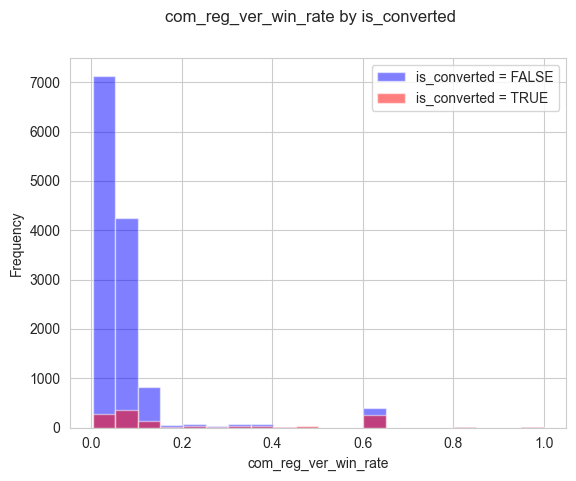

In [18]:
#com_reg_ver_win_rate 74.7%

fig, ax = plt.subplots()

ax.hist(df[df['is_converted'] == 'FALSE']['com_reg_ver_win_rate'], bins=20, alpha=0.5, color='blue', label='is_converted = FALSE')
ax.hist(df[df['is_converted'] == 'TRUE']['com_reg_ver_win_rate'], bins=20, alpha=0.5, color='red', label='is_converted = TRUE')

ax.set_xlabel('com_reg_ver_win_rate')
ax.set_ylabel('Frequency')

fig.suptitle('com_reg_ver_win_rate by is_converted')
ax.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


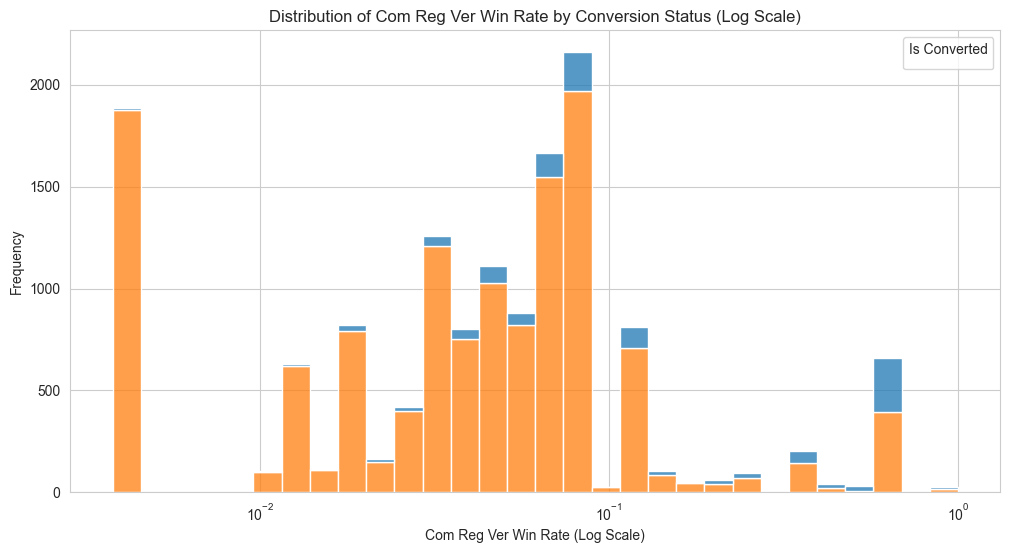

In [19]:
#logscale로 representation

plt.figure(figsize=(12, 6))
# Plotting with log scale on x-axis
sns.histplot(data=df, x='com_reg_ver_win_rate', hue='is_converted', multiple='stack', bins=30, log_scale=(True, False))
plt.title('Distribution of Com Reg Ver Win Rate by Conversion Status (Log Scale)')
plt.xlabel('Com Reg Ver Win Rate (Log Scale)')
plt.ylabel('Frequency')
plt.legend(title='Is Converted')
plt.show()

In [20]:
# 상당히 significant한 패턴 발견, t-test로 확인
# 한 그룹의 mean과 다른 그룹의 mean이 차이가 있는지 확인
# Gaussian distribution을 따르는 데이터에 대해서만 사용 가능

df['com_reg_ver_win_rate'] = pd.to_numeric(df['com_reg_ver_win_rate'], errors='coerce')

# Split the data into two groups based on is_converted value
group_true = df[df['is_converted'] == 'TRUE']['com_reg_ver_win_rate'].dropna()
group_false = df[df['is_converted'] == 'FALSE']['com_reg_ver_win_rate'].dropna()

# Run the t-test
t_stat, p_value = ttest_ind(group_true, group_false)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# T-statistic: 양수, p-value 0.05 이하 -> significant
# NA율이 높아도 is_converted에 영향을 미치는 것으로 보임, 가져가야할듯

T-statistic: 41.21953510539725, P-value: 0.0


In [21]:
# Wilcoxon test로 확인사살
# Gaussian distribution을 따르지 않는 데이터에 대해서 사용 가능
# 데이터의 rank based comparison을 수행

df['com_reg_ver_win_rate'] = pd.to_numeric(df['com_reg_ver_win_rate'], errors='coerce')

# Split the data into two groups based on is_converted value
group_true = df[df['is_converted'] == 'TRUE']['com_reg_ver_win_rate'].dropna()
group_false = df[df['is_converted'] == 'FALSE']['com_reg_ver_win_rate'].dropna()

# Run the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(group_true, group_false, alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# p-value 상당히 작음 -> significant

U-statistic: 11564046.0, P-value: 1.184489223141181e-189


### customer_type vs. is_converted
#### categorical, nominal data

In [22]:
print(len(df.customer_type.unique())) # unique 한 value값 수
df.customer_type.value_counts() # value별 count

# 아래 보면, 'End-Customer' 와 'End Customer'은 같은 값이지만 오타로 다른 값처럼 사용된다.
# 둘을 하나로 합치고 작업하면 되고, 밑에 그런 예시가 더 있지만, 숫자가 상대적으로 너무 작아서 무시해도 무방하다.

34


customer_type
End-Customer                    6552
End Customer                    3546
Specifier/ Influencer           2328
Channel Partner                 1282
Service Partner                  316
Solution Eco-Partner             128
Installer/Contractor              42
Specifier / Influencer            38
Corporate                         28
Engineer                          18
HVAC Engineer                     17
Technician                        16
Consultant                        15
Developer                         14
Other                             10
Software/Solution Provider         7
End-user                           7
Manager / Director                 7
Home Owner                         6
Etc.                               6
Architect/Consultant               5
Homeowner                          5
Installer                          5
Interior Designer                  5
Distributor                        4
Others                             4
Reseller                

In [23]:
# Replace 'End Customer' with 'End-Customer' in 'customer_type' column
df['customer_type'] = df['customer_type'].replace('End Customer', 'End-Customer')

# Optionally, check the updated value counts to confirm the change
updated_counts = df['customer_type'].value_counts()

print(updated_counts)

# End-Customer 로 병합 완료. 이제 analysis 시작. 

customer_type
End-Customer                    10098
Specifier/ Influencer            2328
Channel Partner                  1282
Service Partner                   316
Solution Eco-Partner              128
Installer/Contractor               42
Specifier / Influencer             38
Corporate                          28
Engineer                           18
HVAC Engineer                      17
Technician                         16
Consultant                         15
Developer                          14
Other                              10
Software/Solution Provider          7
End-user                            7
Manager / Director                  7
Etc.                                6
Home Owner                          6
Architect/Consultant                5
Homeowner                           5
Installer                           5
Interior Designer                   5
Distributor                         4
Others                              4
Reseller                            

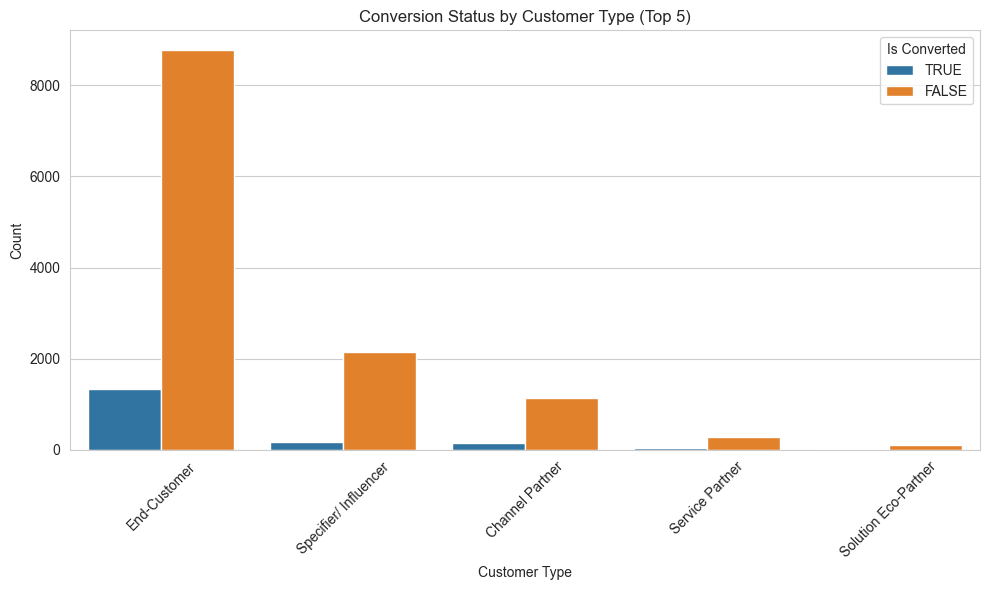

In [24]:
# visual analysis

# Find the top 5 most common values in 'customer_type'
top_5_customer_types = df['customer_type'].value_counts().nlargest(5).index

# Filter the DataFrame to keep only rows with the top 5 'customer_type' values
df_top_5_customer_types = df[df['customer_type'].isin(top_5_customer_types)]

# Create a count plot for the filtered DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_5_customer_types, x='customer_type', hue='is_converted', 
              order=df_top_5_customer_types['customer_type'].value_counts().index)

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Conversion Status by Customer Type (Top 5)')
plt.legend(title='Is Converted', loc='upper right')

plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()

#이렇게만 보면 또 헷갈리니, odds_ratio로 확인한다. 

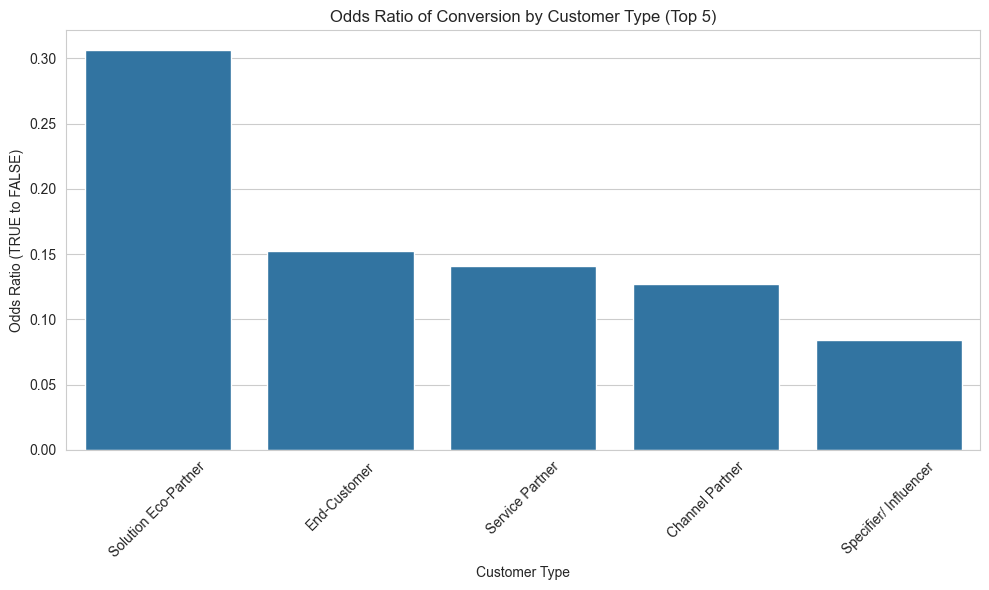

In [26]:
# Assuming df_top_5_customer_types contains only the top 5 'customer_type' categories
conversion_counts = df_top_5_customer_types.groupby('customer_type')['is_converted'].value_counts().unstack(fill_value=0)

# Calculate the odds ratio ('TRUE' to 'FALSE') for each 'customer_type'
conversion_counts['odds_ratio'] = conversion_counts['TRUE'] / conversion_counts['FALSE']

# Reset the index to make 'customer_type' a column again for plotting
conversion_counts.reset_index(inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=conversion_counts, x='customer_type', y='odds_ratio', order=conversion_counts.sort_values('odds_ratio', ascending=False)['customer_type'])

plt.xticks(rotation=45)
plt.xlabel('Customer Type')
plt.ylabel('Odds Ratio (TRUE to FALSE)')
plt.title('Odds Ratio of Conversion by Customer Type (Top 5)')

plt.tight_layout()
plt.show()

In [ ]:
# Solution Eco-Partner가 상당히 높은것은 알겠으나, confidence가 없는것은, sample수가 워낙 적어서이다.

### historical_existing_cnt vs. is_converted
#### numerical data, int type

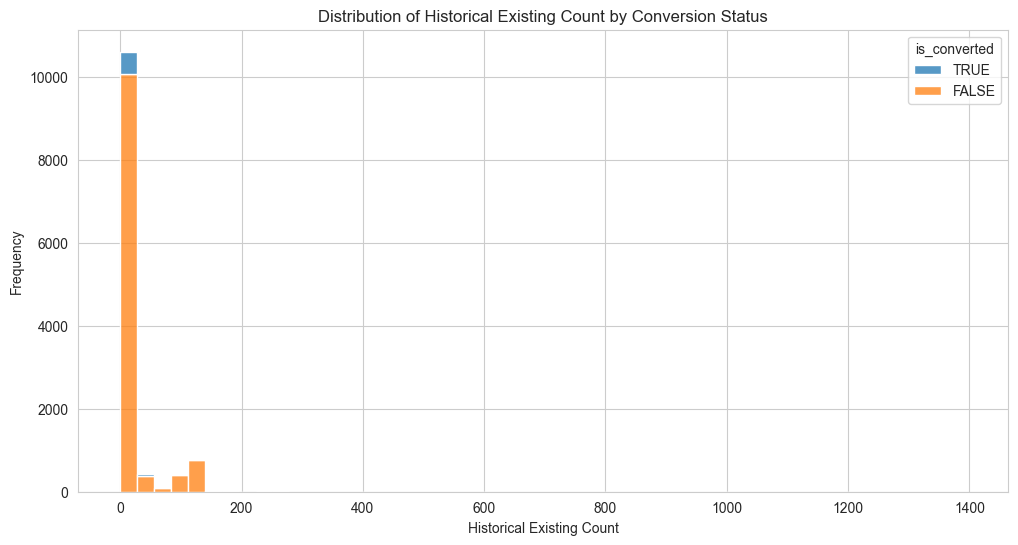

In [23]:
#historical_existing_cnt (77.7%)

# Histograms
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='historical_existing_cnt', hue='is_converted', multiple='stack', bins=50, kde=False)
plt.title('Distribution of Historical Existing Count by Conversion Status')
plt.xlabel('Historical Existing Count')
plt.ylabel('Frequency')
plt.show()

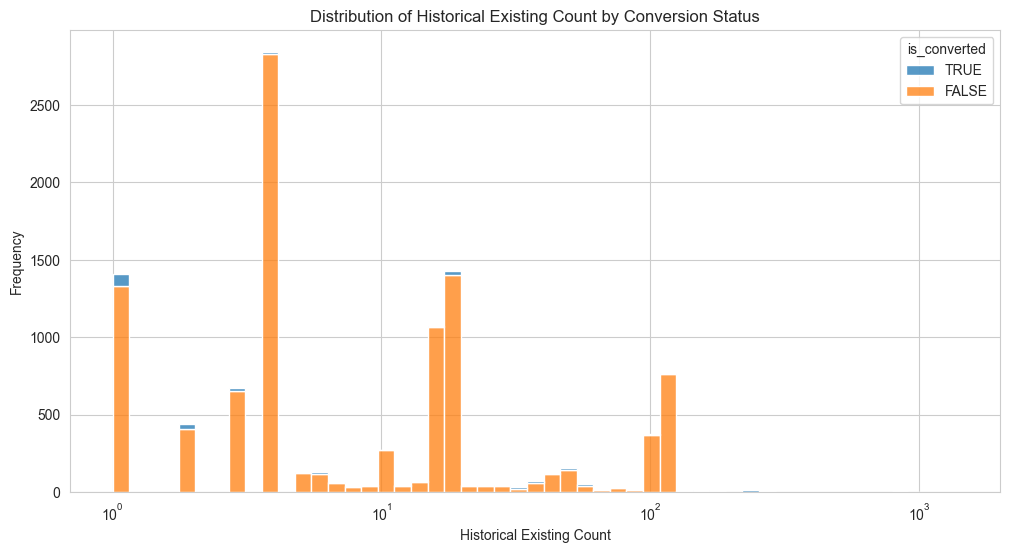

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='historical_existing_cnt', hue='is_converted', multiple='stack', log_scale=True)  # Log scale
plt.title('Distribution of Historical Existing Count by Conversion Status')
plt.xlabel('Historical Existing Count')
plt.ylabel('Frequency')
plt.show()

#뭔가 historical existing count가 높을수록, 다시 우리와의 계약이 체결될 확률이 높을 줄 알았지만,
#아래에서 보듯이 아무런 연관성이 없어보인다.

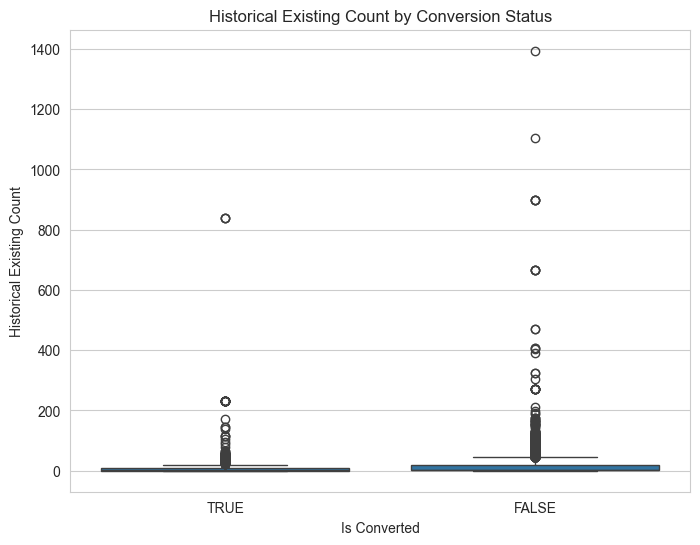

In [21]:
#historical_existing_cnt (77.7%)

# Boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_converted', y='historical_existing_cnt', data=df)
plt.title('Historical Existing Count by Conversion Status')
plt.xlabel('Is Converted')
plt.ylabel('Historical Existing Count')
plt.show()

#boxplot으로 봐도 뚜렷한 차이가 없어보인다.

In [22]:
# Split the data into two groups
group_true = df[df['is_converted'] == 'TRUE']['historical_existing_cnt']
group_false = df[df['is_converted'] == 'FALSE']['historical_existing_cnt']

# Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(group_true, group_false)

print(f'Mann-Whitney U statistic: {stat}, P-value: {p_value}')

Mann-Whitney U statistic: nan, P-value: nan


### product_subcategory vs. is_converted
#### categorical, nominal data

In [37]:
print(len(df.product_subcategory.unique())) # unique 한 value값 수
df.product_subcategory.value_counts() # value별 count

# product model name 과 동일한 방법으로 봐야하는 칼럼. 
# 애초에 subcategory를 아시는 분들은 model명도 아신다고 볼 수 있는게,
# subcategory가 model명보다 더 큰 범주이기 때문이기도 하고
# 아래와 같이 증명하고자 한다. 

331


product_subcategory
All Medical Displays                440
Interactive Digital Board           413
TR3BF Series                        370
Diagnostic Monitors                 276
Transparent OLED Signage            270
                                   ... 
AIO                                   1
We dont offer T/F spoke to HA PM      1
LG One:Quick Flex (Telehealth)        1
VL5G-A Series                         1
EVR                                   1
Name: count, Length: 330, dtype: int64

In [39]:
# product_subcategory 를 답한 사용자들이 product_model_name도 답했는지 확인

# Filter rows where 'product_subcategory' is not NA
rows_with_subcategory = df.dropna(subset=['product_subcategory'])

# Of these, count how many also have 'product_modelname' not NA
rows_with_both = rows_with_subcategory.dropna(subset=['product_modelname'])

# Calculate proportions
total_rows_with_subcategory = len(rows_with_subcategory)
rows_with_both_count = len(rows_with_both)
proportion_with_both = rows_with_both_count / total_rows_with_subcategory

print(f"Total rows with 'product_subcategory' not NA: {total_rows_with_subcategory}")
print(f"Rows with both 'product_subcategory' and 'product_modelname' not NA: {rows_with_both_count}")
print(f"Proportion with both not NA: {proportion_with_both:.2f}")

# 83%의 확률로, subcategory를 답한 사용자들은 model명도 답했다. 
# 강한 상관관계가 있음을 알 수 있다. 앞으로 두 칼럼은 비슷한 전략을 적용할것.

Total rows with 'product_subcategory' not NA: 9006
Rows with both 'product_subcategory' and 'product_modelname' not NA: 7471
Proportion with both not NA: 0.83


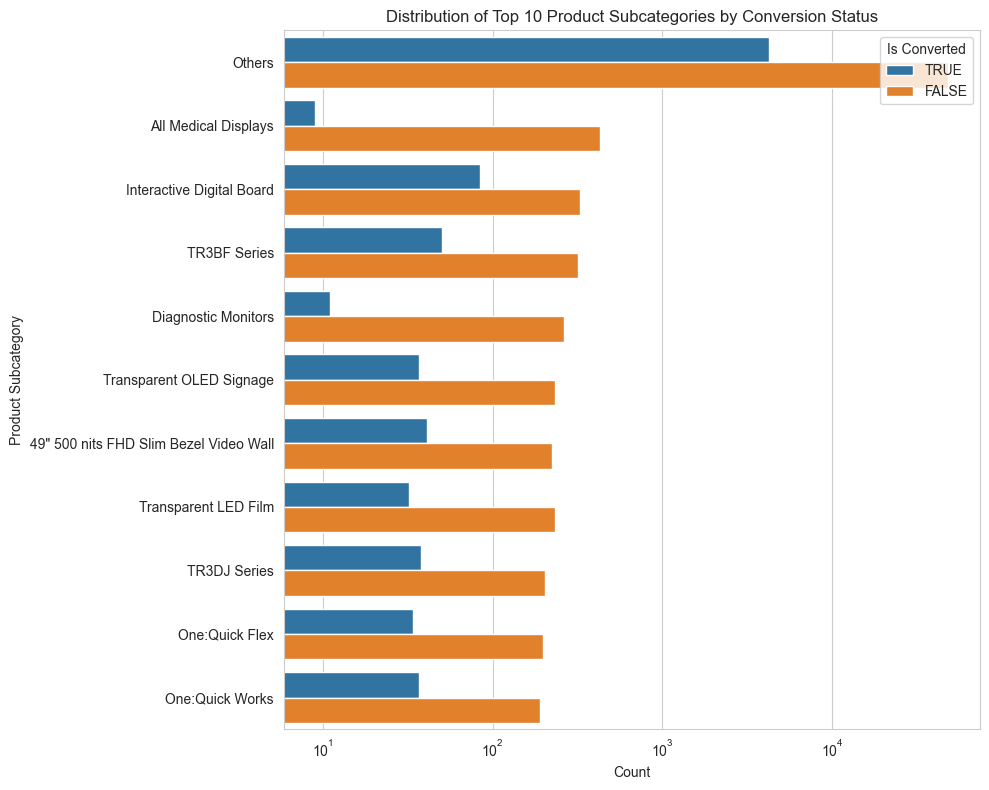

In [20]:
#product_subcategory (83.9%)
#value들이 너무 많아서, 가장 많이 반복되는 value 10개를 제외하고 나머지는 'Others'로 통합

# Focus on top 10 'product_subcategory' values
top_10_subcategories = df['product_subcategory'].value_counts().nlargest(10).index
df['product_subcategory'] = df['product_subcategory'].apply(lambda x: x if x in top_10_subcategories else 'Others')

# Plot adjustments
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.countplot(data=df, y='product_subcategory', hue='is_converted', order=df['product_subcategory'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.title('Distribution of Top 10 Product Subcategories by Conversion Status')
plt.legend(title='Is Converted', loc='upper right')

# Set x-axis to log scale
plt.xscale('log')

plt.tight_layout()
plt.show()

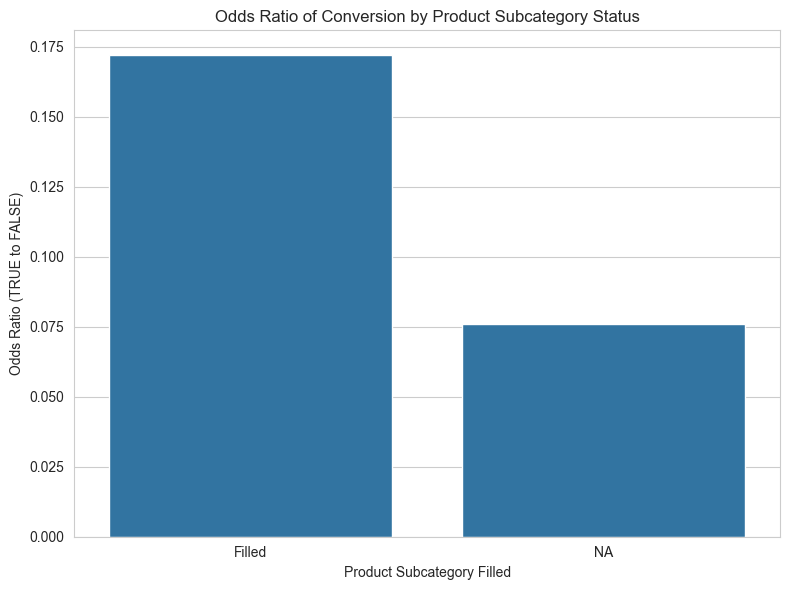

In [52]:
# product_modelname과 마찬가지로, subcategory를 기입한 사용자들이 과연 is_converted에 영향을 미치는지 확인해보자.

# Create a new column to categorize rows based on 'product_subcategory' being filled or NA
df['product_subcategory_filled'] = np.where(df['product_subcategory'].isna(), 'NA', 'Filled')

# Calculate the counts of 'is_converted' for each category
conversion_counts = df.groupby('product_subcategory_filled')['is_converted'].value_counts().unstack(fill_value=0)

# Calculate odds ratio ('TRUE' to 'FALSE') for each category
conversion_counts['odds_ratio'] = conversion_counts['TRUE'] / conversion_counts['FALSE']

# Reset index to make 'product_subcategory_filled' a column (for plotting)
conversion_counts.reset_index(inplace=True)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(data=conversion_counts, x='product_subcategory_filled', y='odds_ratio')
plt.xlabel('Product Subcategory Filled')
plt.ylabel('Odds Ratio (TRUE to FALSE)')
plt.title('Odds Ratio of Conversion by Product Subcategory Status')
plt.tight_layout()
plt.show()

# 아래서 보듯이, subcategory를 기입한 사용자들이 is_converted가 TRUE가 되는데 영향을 미치는 것으로 보인다.

### product_modelname vs. is_converted
#### categorical, nominal data

In [36]:
print(len(df.product_modelname.unique())) # unique 한 value값 수
df.product_modelname.value_counts() # value별 count

# product modelname 같은 경우는 사실 상식적으로 봤을때, product_modelname 자체를 주었느냐 안주었느냐,
# modelname을 알정도로 관심을 가졌느냐라는 정보로, one-hot encoding을 통해
# value가 있으면 1로 인코딩, value가 NA이면 0으로 인코딩하는것이 좋은지 확인하자. 

666


product_modelname
UltraFine Ergo(32UN880)    519
28MQ780                    471
All Medical Displays       348
43HT3WJ                    278
55CT5WJ                    258
                          ... 
55US660H0SD.BWZ              1
86UL3J                       1
55EJ5E-B                     1
43UT662M (MEA)               1
55US660H (SCA)               1
Name: count, Length: 665, dtype: int64

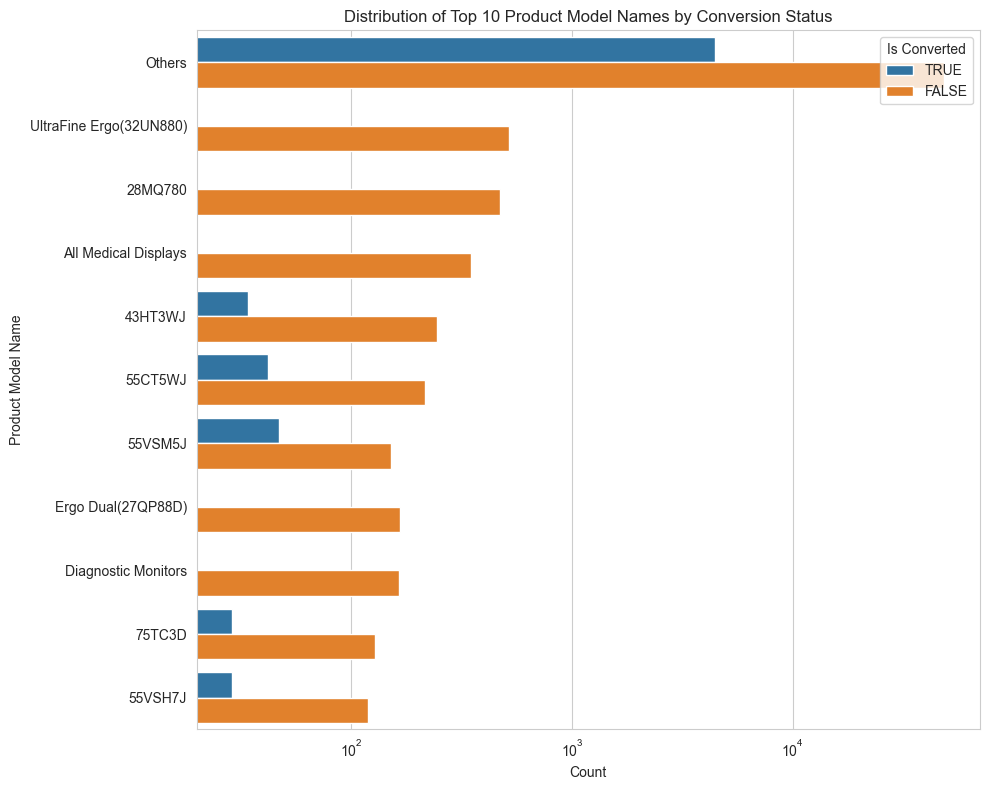

In [21]:
#product_modelname (83.9%)

# 위와 동일한 방법으로 진행

# Focus on top 10 'product_modelname' values
top_10_subcategories = df['product_modelname'].value_counts().nlargest(10).index
df['product_modelname'] = df['product_modelname'].apply(lambda x: x if x in top_10_subcategories else 'Others')

# Plot adjustments
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.countplot(data=df, y='product_modelname', hue='is_converted', order=df['product_modelname'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Product Model Name')
plt.title('Distribution of Top 10 Product Model Names by Conversion Status')
plt.legend(title='Is Converted', loc='upper right')

# Set x-axis to log scale
plt.xscale('log')

plt.tight_layout()
plt.show()

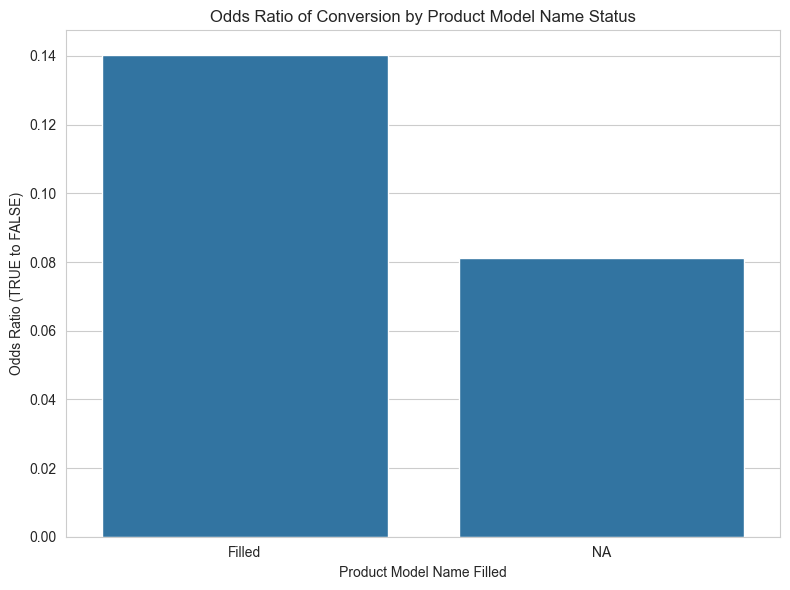

In [51]:
# 위 visualization 만으로는, 특정 modelname의 영향은 없어보인다. 우리가 진짜 알고 싶은 insight는, 
# modelname을 작성한 사용자들이 conversion에 영향을 미치는지 여부이다.

# Create a new column to categorize rows based on 'product_modelname' being filled or NA
df['product_modelname_filled'] = np.where(df['product_modelname'].isna(), 'NA', 'Filled')

# Calculate the counts of 'is_converted' for each category
conversion_counts = df.groupby('product_modelname_filled')['is_converted'].value_counts().unstack(fill_value=0)

# Calculate odds ratio ('TRUE' to 'FALSE') for each category
conversion_counts['odds_ratio'] = conversion_counts['TRUE'] / conversion_counts['FALSE']

# Reset index to make 'product_modelname_filled' a column (for plotting)
conversion_counts.reset_index(inplace=True)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(data=conversion_counts, x='product_modelname_filled', y='odds_ratio')
plt.xlabel('Product Model Name Filled')
plt.ylabel('Odds Ratio (TRUE to FALSE)')
plt.title('Odds Ratio of Conversion by Product Model Name Status')
plt.tight_layout()
plt.show()

#아래서 보듯이, modelname을 작성한 사용자들은 convert할 확률이 거의 두배에 미친다. 

### expected_timeline vs. is_converted
#### categorical, nominal data -> 정제하면 ordinal data 가능

In [34]:
print(len(df.expected_timeline.unique())) # unique 한 value값 수
df.expected_timeline.value_counts() # value별 count

#전략적으로, 상위 종목 5개가 아니면, 'Others'로 통합하거나 drop하는 것이 좋을 것으로 보임

450


expected_timeline
less than 3 months                                                                                                            16768
3 months ~ 6 months                                                                                                            4798
more than a year                                                                                                               2874
9 months ~ 1 year                                                                                                              1070
6 months ~ 9 months                                                                                                            1043
                                                                                                                              ...  
no requirement of this time                                                                                                       1
not reachable , lead shared with partner                  

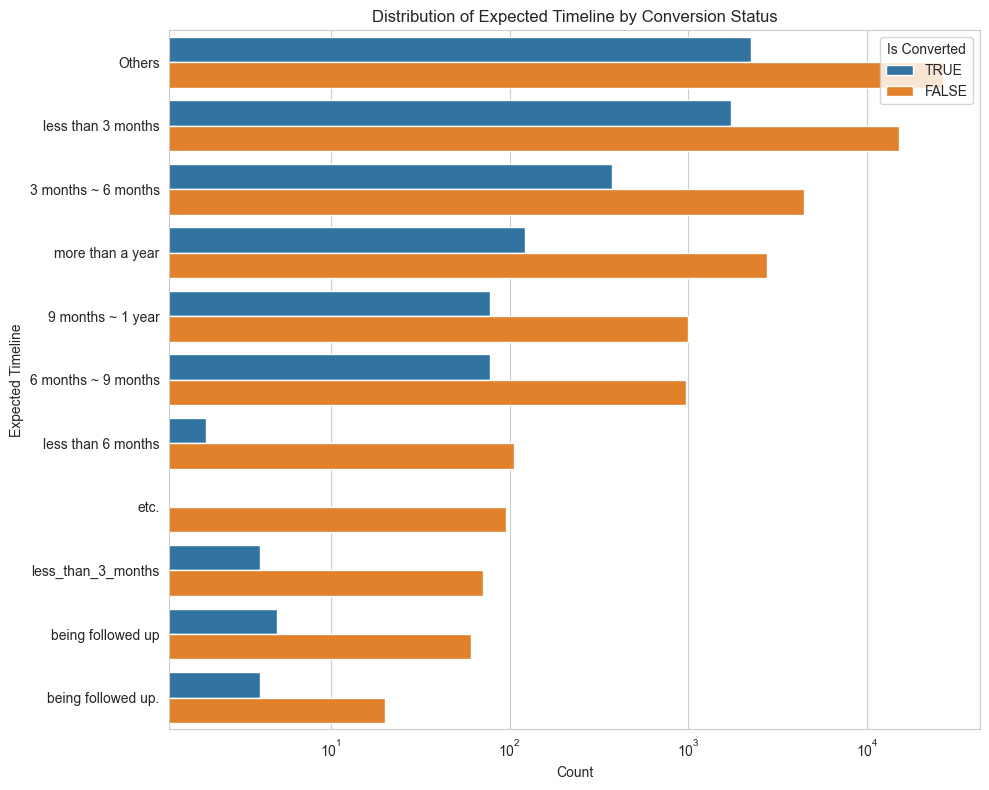

In [22]:
# expected_timeline (50.8%)

top_expected_timelines = df['expected_timeline'].value_counts().nlargest(10).index

# Replace all other 'expected_timeline' values with 'Others'
df['expected_timeline'] = df['expected_timeline'].apply(lambda x: x if x in top_expected_timelines else 'Others')

plt.figure(figsize=(10, 8))  # Adjust figure size for readability
sns.countplot(data=df, y='expected_timeline', hue='is_converted', order=df['expected_timeline'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Expected Timeline')
plt.title('Distribution of Expected Timeline by Conversion Status')
plt.legend(title='Is Converted', loc='upper right')

# If applying a semilog scale is meaningful for the counts
plt.xscale('log')

plt.tight_layout()
plt.show()

In [23]:
# running test chi-square test on expected_timeline
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['expected_timeline'], df['is_converted'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}, p-value: {p}")

#Given the p-value is far below the common significance level (α) of 0.05 
#you can reject the null hypothesis and conclude that there is a 
#statistically significant association between the expected_timeline 
#and the conversion status (is_converted). 
#This means that the likelihood of conversion appears to be related to 
#the expected timeline categories you've defined in your dataset.

Chi-squared: 182.40989486015258, p-value: 7.4013533407446e-34


### ver_win_rate_x vs. is_converted
#### numerical data, float type

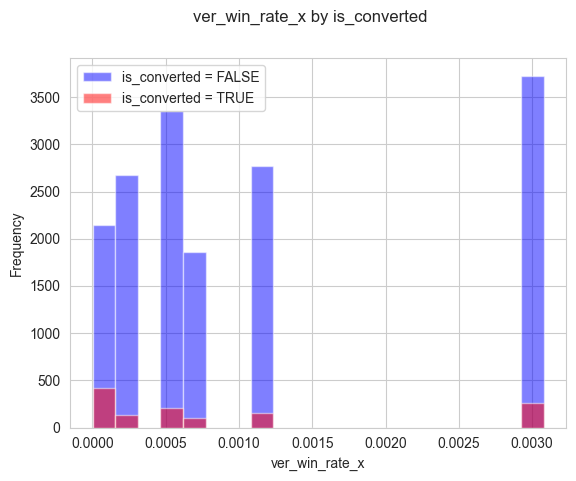

In [47]:
# ver_win_rate_x (68.1%)

fig, ax = plt.subplots()

ax.hist(df[df['is_converted'] == 'FALSE']['ver_win_rate_x'], bins=20, alpha=0.5, color='blue', label='is_converted = FALSE')
ax.hist(df[df['is_converted'] == 'TRUE']['ver_win_rate_x'], bins=20, alpha=0.5, color='red', label='is_converted = TRUE')

ax.set_xlabel('ver_win_rate_x')
ax.set_ylabel('Frequency')

fig.suptitle('ver_win_rate_x by is_converted')
ax.legend()

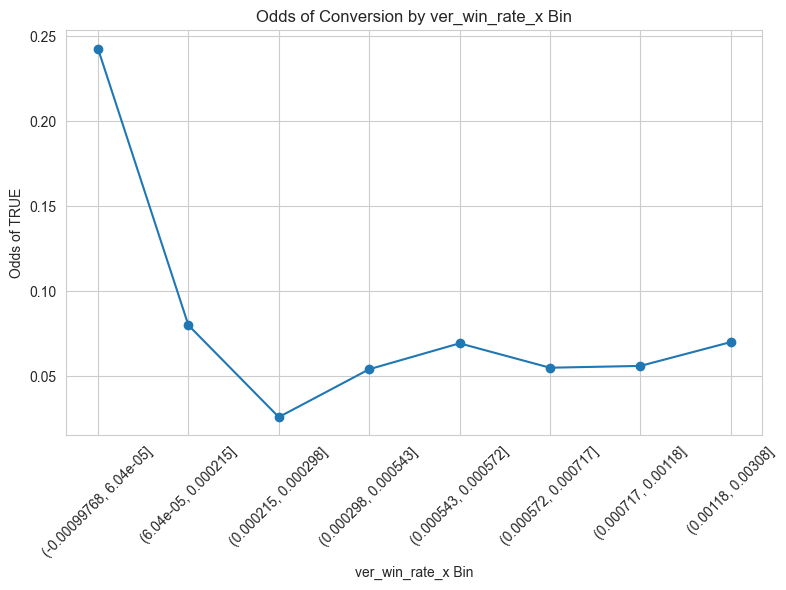

In [48]:
# odds ratio로 확인

df['ver_win_rate_x_bin'] = pd.qcut(df['ver_win_rate_x'].dropna(), q=10, duplicates='drop')

# Calculate the counts for TRUE and FALSE in each bin
counts = df.groupby(['ver_win_rate_x_bin', 'is_converted']).size().unstack(fill_value=0)

# Calculate the odds of being TRUE in each bin
counts['odds_true'] = counts['TRUE'] / counts['FALSE']

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(counts.index.astype(str), counts['odds_true'], marker='o', linestyle='-')
plt.xlabel('ver_win_rate_x Bin')
plt.ylabel('Odds of TRUE')
plt.title('Odds of Conversion by ver_win_rate_x Bin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 상관관계 발견, wilcoxon test로 확인
# ver_win_rate_x 가 낮을 수록 odds 가 높음을 확인. 

In [50]:
# wilcoxon test

group_true = df[df['is_converted'] == 'TRUE']['ver_win_rate_x'].dropna()
group_false = df[df['is_converted'] == 'FALSE']['ver_win_rate_x'].dropna()

u_stat, p_value = mannwhitneyu(group_true, group_false)

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# U-statistic: 양수, p-value 0.00001 이하 -> significant 증명

#significance가 있음을 확인

U-statistic: 8728712.0, P-value: 3.4331304190044304e-23


### ver_win_ratio_per_bu vs. is_converted
#### numerical data, float type

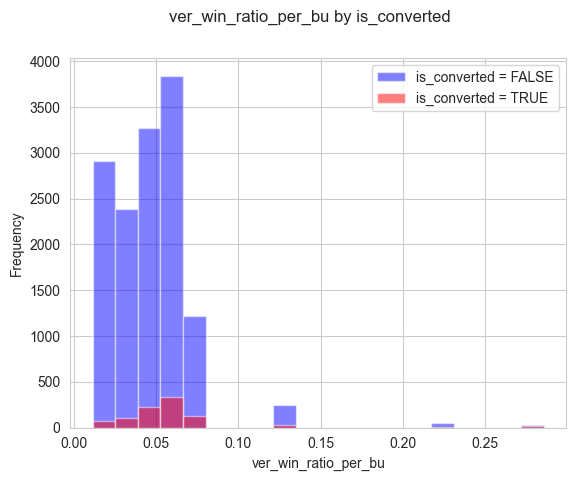

In [26]:
# ver_win_ratio_per_bu (73.3%)

fig, ax = plt.subplots()

ax.hist(df[df['is_converted'] == 'FALSE']['ver_win_ratio_per_bu'], bins=20, alpha=0.5, color='blue', label='is_converted = FALSE')
ax.hist(df[df['is_converted'] == 'TRUE']['ver_win_ratio_per_bu'], bins=20, alpha=0.5, color='red', label='is_converted = TRUE')

ax.set_xlabel('ver_win_ratio_per_bu')
ax.set_ylabel('Frequency')

fig.suptitle('ver_win_ratio_per_bu by is_converted')
ax.legend()

#ver_win_ratio_per_bu는 아래에서 보듯이 is_converted와 상당한 association을 보임
#ver_win_ratio_per_bu가 높을수록 is_converted가 TRUE일 확률이 높아보임

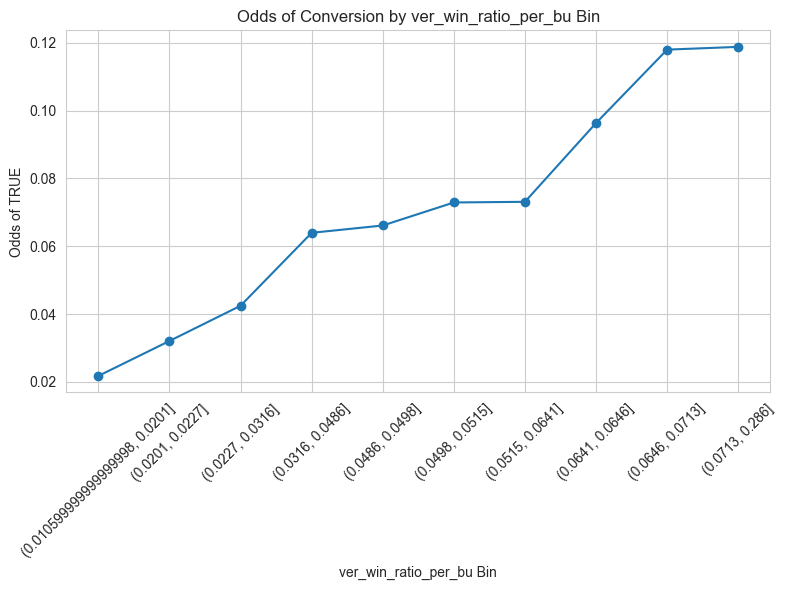

In [28]:
#odds ratio로 보면 더 분명할것같아서, 아래와 같이 10개 quantiles로 나누어서 plot 해보니 linear 한 상승값을 보인다. 

# Example: Binning 'ver_win_ratio_per_bu' into quantiles for simplicity
df['ver_win_ratio_per_bu_bin'] = pd.qcut(df['ver_win_ratio_per_bu'].dropna(), q=10, duplicates='drop')

# Calculate the counts for TRUE and FALSE in each bin
counts = df.groupby(['ver_win_ratio_per_bu_bin', 'is_converted']).size().unstack(fill_value=0)

# Calculate the odds of being TRUE in each bin
counts['odds_true'] = counts['TRUE'] / counts['FALSE']

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(counts.index.astype(str), counts['odds_true'], marker='o', linestyle='-')
plt.xlabel('ver_win_ratio_per_bu Bin')
plt.ylabel('Odds of TRUE')
plt.title('Odds of Conversion by ver_win_ratio_per_bu Bin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
# 우리의 이런 가정을 증명하기 위해서, Wilcoxon test 진행

group_true = df[df['is_converted'] == 'TRUE']['ver_win_ratio_per_bu'].dropna()
group_false = df[df['is_converted'] == 'FALSE']['ver_win_ratio_per_bu'].dropna()

u_stat, p_value = mannwhitneyu(group_true, group_false)

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# U-statistic: 양수, p-value 0.00001 이하 -> significant 증명

U-statistic: 8073815.5, P-value: 2.045638624818112e-39


### business_area vs. is_converted
#### categorical, nominal data

In [33]:
print(len(df.business_area.unique()))
df.business_area.value_counts()

13


business_area
corporate / office                3989
retail                            2924
hotel & accommodation             1959
special purpose                   1873
residential (home)                1786
education                         1682
hospital & health care            1023
factory                           1013
government department              635
public facility                    502
transportation                     292
power plant / renewable energy     108
Name: count, dtype: int64

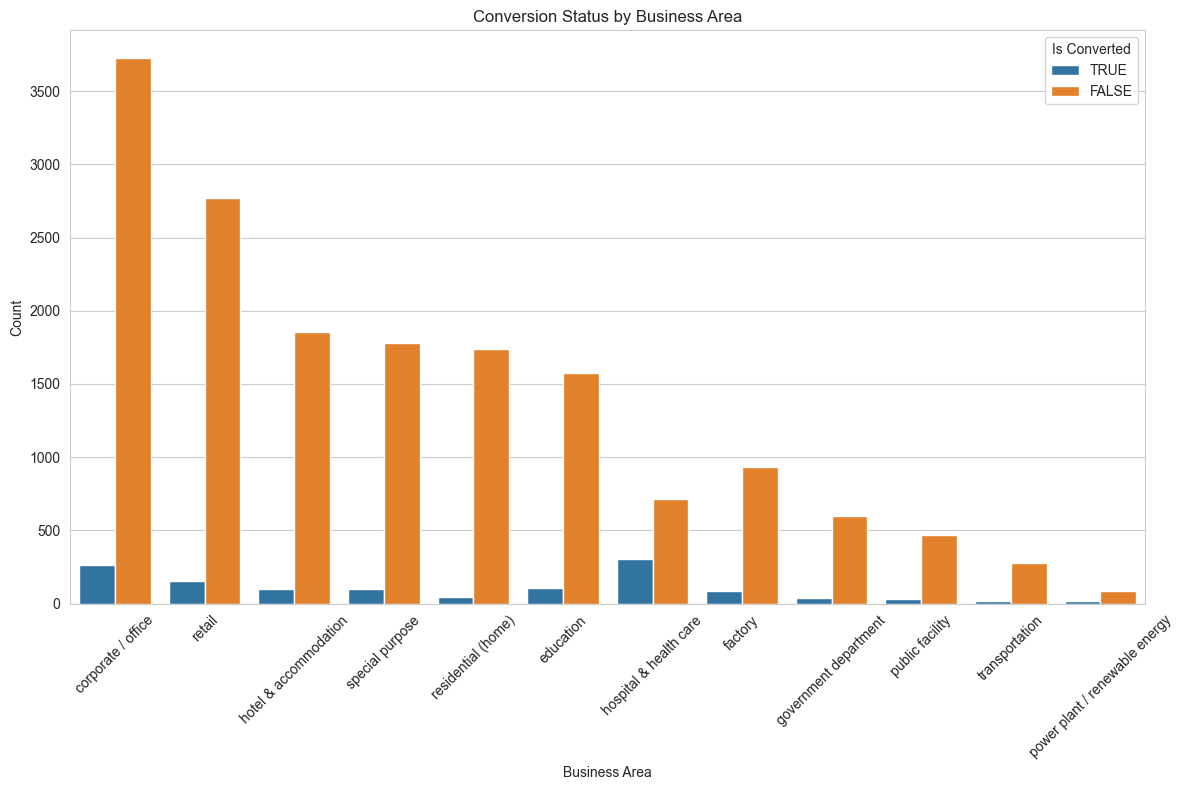

In [40]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.countplot(data=df, x='business_area', hue='is_converted', order=df['business_area'].value_counts().index)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.xlabel('Business Area')
plt.ylabel('Count')
plt.title('Conversion Status by Business Area')
plt.legend(title='Is Converted')
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()

#이렇게만 보면 애매모호하니, odds ratio로 보자

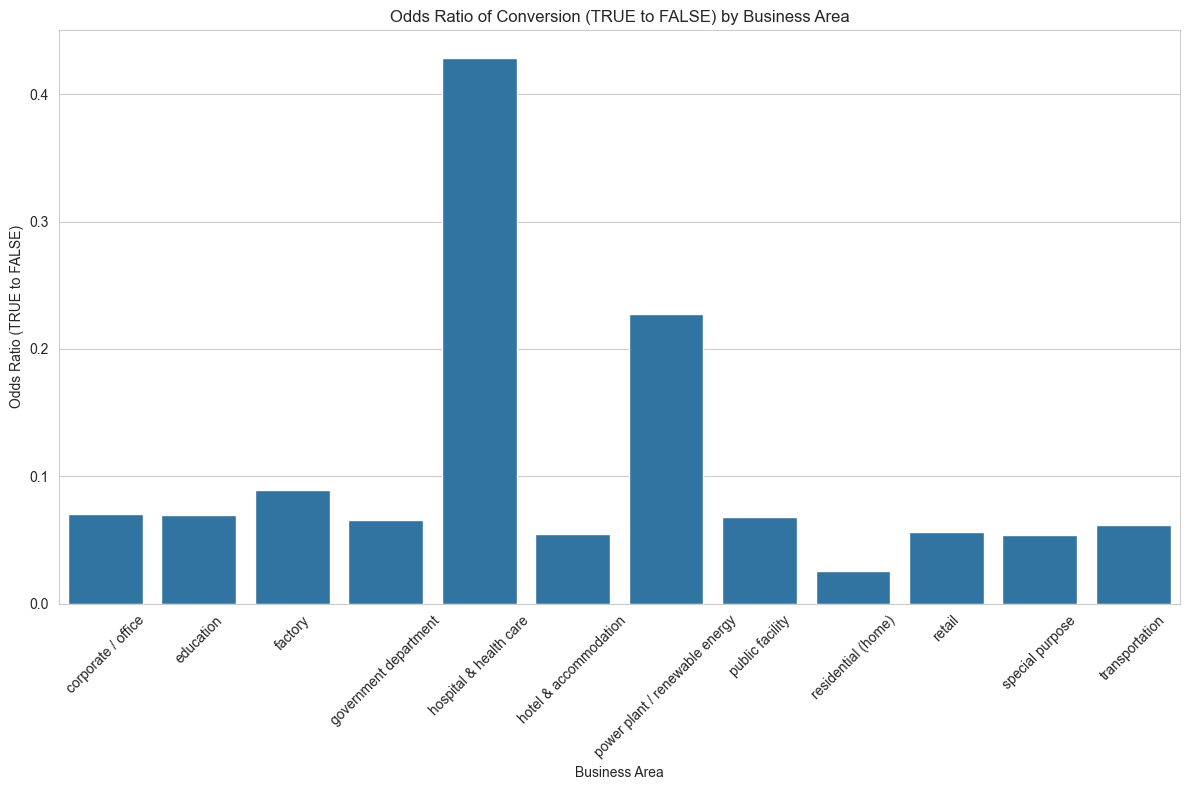

In [43]:
# odds ratio로 visualize 하였을때

# Calculate counts of 'is_converted' for each 'business_area'
conversion_counts = df.groupby('business_area')['is_converted'].value_counts().unstack(fill_value=0)

# Invert the odds ratio to 'TRUE' to 'FALSE'
conversion_counts['odds_ratio_true_to_false'] = conversion_counts['TRUE'] / conversion_counts['FALSE']

# Ensure there's no division by zero; handle cases where 'FALSE' count is 0
conversion_counts['odds_ratio_true_to_false'] = conversion_counts['odds_ratio_true_to_false'].replace([np.inf, -np.inf], np.nan)

# Reset index to make 'business_area' a column (for plotting)
conversion_counts.reset_index(inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=conversion_counts, x='business_area', y='odds_ratio_true_to_false')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.xlabel('Business Area')
plt.ylabel('Odds Ratio (TRUE to FALSE)')
plt.title('Odds Ratio of Conversion (TRUE to FALSE) by Business Area')
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()

#아래는 TRUE-to-FALSE odds ratio 인데, 유독 hospital&health care 관련일때와, 
# power plant & renewable energy 일때 높은 odds ratio를 보인다.
# 이것은 business_area가 is_converted에 영향을 미친다는 것을 보여준다.

In [45]:
# significance 를 chi-square test로 확인
from scipy.stats import chi2_contingency

# Create a contingency table of observed counts
contingency_table = pd.crosstab(df['business_area'], df['is_converted'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}, P-value: {p}")

# chi-square 높은 양수값, p-value 0.05 이하 -> business_area vs. is_converted == significant 

Chi-square Statistic: 932.7697730435593, P-value: 5.57586535061509e-193
